In [1]:
import os
from octree_with_nodes import OctreeNode
from octree_with_nodes import Octree
from octree_with_nodes import Point
from octree_with_nodes import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import numpy as np
from PIL import Image

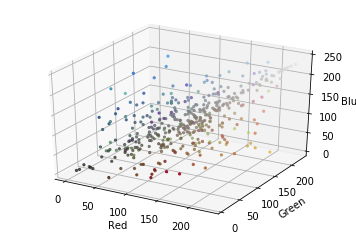

In [2]:
allImages = './Stock Pictures'
mainImage = './Stock Pictures/wildfireresources random (145).jpg'
files = [os.path.join(allImages,f) for f in os.listdir(allImages) if os.path.isfile(os.path.join(allImages,f))]

# print("done getting images")

sizeMainImg = 640,640
sizeAllImg = 150,150

redList = []
greenList = []
blueList = []
rgbList = []
colors = []
imgDict = {}

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

boundary = Rectangle(127.5,127.5,127.5,127.5,127.5)
tree = Octree(boundary,9)

for i,file in enumerate(files):
    redAve = 0
    greenAve = 0
    blueAve = 0
    count = 0
    
    im = Image.open(file)
    im.thumbnail(sizeAllImg, Image.ANTIALIAS)
    imgArr = np.asarray(im)

    for x in range(0, imgArr.shape[0]-1):
        for y in range(0, imgArr.shape[1]-1):
#             print(imgArr[x,y][0],imgArr[x,y][1],imgArr[x,y][2])
            redAve += imgArr[x,y][0]
            greenAve += imgArr[x,y][1]
            blueAve += imgArr[x,y][2]
    
    redAve = int(round(redAve/(imgArr.shape[0]*imgArr.shape[1])))
    blueAve = int(round(blueAve/(imgArr.shape[0]*imgArr.shape[1])))
    greenAve = int(round(greenAve/(imgArr.shape[0]*imgArr.shape[1])))
    
#     print("\n\nAdding new Point")
    tree.newPoint(Point(redAve,greenAve,blueAve))
    
    rgb2hex = lambda r,g,b: f"#{r:02x}{g:02x}{b:02x}"
    colors.append(rgb2hex(redAve,greenAve,blueAve))
    
    imgDict[colors[i]] = file
#     print(65536 * redAve + 256 * greenAve + blueAve, redAve,greenAve,blueAve)
    
    redList.append(redAve)
    greenList.append(greenAve)
    blueList.append(blueAve)

# print("\ndone getting pixel color averages")

im = Image.open(mainImage)
im.thumbnail(sizeMainImg, Image.ANTIALIAS)

r, g, b = list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2))

axis.scatter(redList, greenList, blueList, c=colors,marker=".")
# axis.scatter(list(im.getdata(0)), list(im.getdata(1)), list(im.getdata(2)), c="black", marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

# print("done plotting both sets of color pixels")


In [3]:
root = tree.node
root.getTotalPoints(root)

400

In [4]:
# point = Point()
# closestPoint = root.closestImageRGB(root,point)
width,height = im.size
print(width,height)
print(width * height)

# im = im.frombytes("RGB", (width, height), im)
# im.data

564 564
318096


In [7]:
imgArr = np.asarray(im)
closestPoint = []

# for i in range(0, arr.shape[0]-1):
#     for j in range(0, arr.shape[1]-1):
#         closestPoint.append(root.closestImageRGB(root,Point(arr[i,j][0],arr[i,j][1],arr[i,j][2])))
#         print("\n\n")

# for i in range(0, arr.shape[0]-1):
#     for j in range(0, arr.shape[1]-1):
#         closestPoint.append(root.closestImageRGB(root,Point(arr[i,j][0],arr[i,j][1],arr[i,j][2])))
#         print(arr[i,j][0],arr[i,j][1],arr[i,j][2])

point = root.closestImageRGB(root,Point(imgArr[200,500][0],imgArr[200,500][1],imgArr[200,500][2]))
print(imgArr[200,500][0],imgArr[200,500][1],imgArr[200,500][2])
print(point.x,point.y,point.z)
        
        

corresponding quad found
26.40075756488817 219 142 121
3.4641016151377544 192 134 115
24.020824298928627 211 148 125
26.038433132583073 220 135 101
194 136 122
192 134 115


In [6]:
print(imgDict[rgb2hex(point.x,point.y,point.z)])

./Stock Pictures\whiteboard-one-plus-one.jpg
